# About
This notebook is used to create a subset of the dataset for finetuning a GPT-style conversational language model.

In [1]:
from loguru import logger

In [2]:
# Config
SUBREDDITS = ['hasan_piker']

In [3]:
from datasets import load_dataset
dataset = load_dataset("brianmatzelle/2024-election-subreddit-threads-643k", split = "train")
prefilter_size = len(dataset)

from utils import to_k
logger.info(f"Prefilter dataset size: {to_k(prefilter_size)}")
dataset[0]

README.md:   0%|          | 0.00/909 [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/142M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/142M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/643685 [00:00<?, ? examples/s]

2024-11-27 01:59:22.998 | INFO     | utils:to_k:35 - 643k rows
2024-11-27 01:59:22.998 | INFO     | __main__:<module>:6 - Prefilter dataset size: 643k


{'metadata': {'controversiality': 2,
  'post': {'author': 'Norwegian_Thunder',
   'downvotes': 0,
   'flair': 'Twitter',
   'score': 1253,
   'suggested_sort': 'confidence',
   'upvote_ratio': 0.96,
   'upvotes': 1253},
  'subreddit': {'name': 'destiny', 'subscribers': 248298}},
 'conversations': [{'content': 'You are a redditor, having a conversation with another redditor.',
   'role': 'system'},
  {'content': "Adam accuses Pisco of lying about him. Triggers a Massive Pissing of Receipts (6 clips of prior agreement on Trump's unfitness)",
   'role': 'user'},
  {'content': 'https://preview.redd.it/fj8whwt1v3bd1.jpeg?width=734&amp;format=pjpg&amp;auto=webp&amp;s=845a7c903cf99d83a5d7e194b80032c45434f027',
   'role': 'assistant'}]}

In [4]:
from collections import Counter

# Count the posts in each subreddit
subreddit_counts = Counter(post['metadata']['subreddit']['name'] for post in dataset)
# Sort by the number of posts in descending order
ranked_subreddits = sorted(subreddit_counts.items(), key=lambda x: x[1], reverse=True)

# Print the ranking
for i, (subreddit, count) in enumerate(ranked_subreddits, start=1):
    for post in dataset:
        if post['metadata']['subreddit']['name'] == subreddit:
            subscribers = post['metadata']['subreddit']['subscribers']
    print(f"{i}. r/{subreddit}: {count} posts, {subscribers} subscribers")

# Optionally log the results if needed
logger.info(f"Subreddit ranking:\n{ranked_subreddits}")

1. r/politics: 308431 posts, 8629594 subscribers
2. r/destiny: 89538 posts, 246305 subscribers
3. r/conservative: 43111 posts, 1117405 subscribers
4. r/neoliberal: 40797 posts, 175843 subscribers
5. r/democrats: 34889 posts, 474533 subscribers
6. r/thedavidpakmanshow: 23748 posts, 51202 subscribers
7. r/vaushv: 13265 posts, 66197 subscribers


KeyboardInterrupt: 

In [ ]:
# show most controversial posts
from collections import defaultdict
from pprint import pprint

# Create a dictionary to store the posts for each subreddit
controversiality = defaultdict(list)
for post in dataset:
    if post['metadata']['controversiality'] < 90:
        continue
    controversiality[post['metadata']['controversiality']] += post


# print the controversiality
pprint(controversiality)


defaultdict(<class 'list'>,
            {90: ['metadata', 'conversations'],
             91: ['metadata', 'conversations'],
             92: ['metadata', 'conversations', 'metadata', 'conversations'],
             93: ['metadata', 'conversations'],
             94: ['metadata', 'conversations', 'metadata', 'conversations'],
             95: ['metadata', 'conversations'],
             97: ['metadata', 'conversations'],
             98: ['metadata', 'conversations'],
             99: ['metadata', 'conversations'],
             100: ['metadata', 'conversations']})


In [15]:
!pip install matplotlib

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

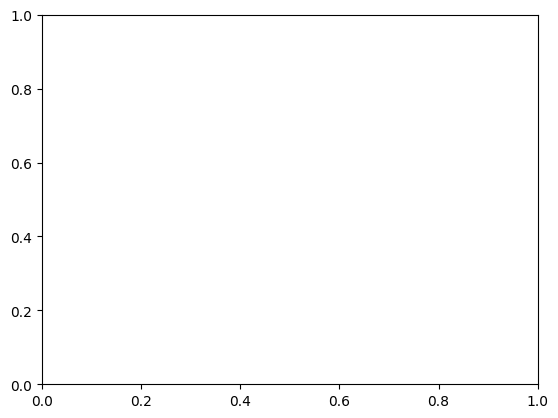

In [16]:
# show the distribution of controversiality via matplotlib
import matplotlib.pyplot as plt
plt.bar(controversiality.keys(), controversiality.values())

In [ ]:
dataset = dataset.filter(lambda x: x['metadata']['subreddit']['name'] in SUBREDDITS)
logger.info(f"Filtered {to_k(prefilter_size - len(dataset))} posts from the dataset")
del prefilter_size

logger.info(f"Dataset size: {to_k(len(dataset))} posts")
dataset[0]